In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# plt.style.use('fivethirtyeight')
#plt.style.use(['ggplot'])
%config IPCompleter.greedy=True
#plt.style.use(['dark_background'])
plt.style.use('seaborn-dark')
#import json
from datetime import datetime
import datetime as dt

In [134]:
CA_csv = pd.read_csv("CAvideos.csv")

CA_csv

In [136]:
CA_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,28719.0,2.071980e+01,6.786226e+00,1.0,20.0,24.0,24.0,43.0
views,28719.0,1.103263e+06,3.333571e+06,1000.0,136660.0,347848.0,925958.0,137843120.0
likes,28719.0,3.825883e+04,1.202369e+05,0.0,2043.5,8637.0,27954.0,3014479.0
dislikes,28719.0,2.041884e+03,2.205901e+04,0.0,92.0,284.0,931.0,1602383.0
comment_count,28719.0,4.836473e+03,1.963137e+04,0.0,385.5,1262.0,3604.5,827755.0


In [137]:
CA_csv.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.131662,-0.135620,-0.015466,-0.052290,0.031635,0.011990,0.002326
views,-0.131662,1.000000,0.823959,0.574538,0.689358,0.011429,0.015074,-0.002225
likes,-0.135620,0.823959,1.000000,0.480867,0.807174,-0.024765,-0.027571,-0.001223
dislikes,-0.015466,0.574538,0.480867,1.000000,0.731002,-0.004846,-0.008020,-0.001115
comment_count,-0.052290,0.689358,0.807174,0.731002,1.000000,-0.029132,-0.017940,-0.002071
comments_disabled,0.031635,0.011429,-0.024765,-0.004846,-0.029132,1.000000,0.156413,-0.002516
ratings_disabled,0.011990,0.015074,-0.027571,-0.008020,-0.017940,0.156413,1.000000,-0.001844
video_error_or_removed,0.002326,-0.002225,-0.001223,-0.001115,-0.002071,-0.002516,-0.001844,1.000000


In [138]:
CA_csv.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [139]:
#Checking for null values
CA_csv.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               916
dtype: int64

Missing 916 values from description - convert to 0

In [140]:
CA_csv['description'] = CA_csv[['description']].replace(np.NaN,0)

CA_csv

In [142]:
CA_csv.shape

(28719, 16)

In [143]:
CA_csv['video_error_or_removed'].value_counts()

False    28706
True        13
Name: video_error_or_removed, dtype: int64

In [144]:
CA_csv['comments_disabled'].value_counts()

False    28323
True       396
Name: comments_disabled, dtype: int64

### Clean data 

In [145]:
#Drop thumbnail_link
CA_youtube_df = CA_csv.drop(['thumbnail_link'], axis=1)

In [146]:
CA_youtube_df.select_dtypes(['int']).describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,28719.0,2.071980e+01,6.786226e+00,1.0,20.0,24.0,24.0,43.0
views,28719.0,1.103263e+06,3.333571e+06,1000.0,136660.0,347848.0,925958.0,137843120.0
likes,28719.0,3.825883e+04,1.202369e+05,0.0,2043.5,8637.0,27954.0,3014479.0
dislikes,28719.0,2.041884e+03,2.205901e+04,0.0,92.0,284.0,931.0,1602383.0
comment_count,28719.0,4.836473e+03,1.963137e+04,0.0,385.5,1262.0,3604.5,827755.0


In [147]:
def makeDataFrame(jsonData):
    listOfId=[]
    listOfGenre=[]
    for i in jsonData['items']:
        listOfId.append(i['id'])
        listOfGenre.append(i['snippet']['title'])

    genreIds={}
    genreIds['id']=listOfId
    genreIds['Genre']=listOfGenre
    genreDf=pd.DataFrame.from_dict(genreIds)
    return genreDf

In [148]:
CA_json = pd.read_json("CA_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [149]:
genre = makeDataFrame(CA_json)

In [150]:
#genre = genre.reset_index(drop = True)

In [151]:
CA_youtube_df = CA_youtube_df.rename(columns={'category_id': 'id'})

In [152]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [153]:
CA_youtube_df = pd.merge(CA_youtube_df, genre, on=['id'],how='left')

CA_youtube_df

In [155]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    CA_youtube_df[column] = CA_youtube_df[column].astype(int)

type_str_list = ['id']
for column in type_str_list:
    CA_youtube_df[column] = CA_youtube_df[column].astype(str)

### Process trending date and published date

In [156]:
CA_youtube_df['trending_date'] = pd.to_datetime(CA_youtube_df['trending_date'], format='%y.%d.%m')
CA_youtube_df['trending_date'].head()

0   2017-11-14
1   2017-11-14
2   2017-11-14
3   2017-11-14
4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [157]:
CA_youtube_df['publish_time'] = pd.to_datetime(CA_youtube_df['publish_time'],format='%Y-%m-%dT%H:%M:%S.%fZ')
CA_youtube_df['publish_time'].head()

0   2017-11-10 17:00:03
1   2017-11-13 17:00:00
2   2017-11-12 19:05:24
3   2017-11-12 18:01:41
4   2017-11-09 11:04:14
Name: publish_time, dtype: datetime64[ns]

In [159]:
# separates date and time into two columns from 'publish_time' column
CA_youtube_df.insert(4, 'publish_date', CA_youtube_df['publish_time'].dt.date)
CA_youtube_df['publish_time'] = CA_youtube_df['publish_time'].dt.time
CA_youtube_df[['publish_date', 'publish_time']].head()

,publish_date,publish_time
0,2017-11-10,17:00:03
1,2017-11-13,17:00:00
2,2017-11-12,19:05:24
3,2017-11-12,18:01:41
4,2017-11-09,11:04:14


CA_youtube_df

### Videos that trended for multiple days

In [161]:
#Remove these videos, few duplicated entries that appeared multiple times in dataset-trended over multiple days
print(CA_youtube_df.shape)
CA_youtube_df = CA_youtube_df[~CA_youtube_df.index.duplicated(keep='last')]

(28719, 17)


In [162]:
print(CA_youtube_df.shape)
CA_youtube_df.index.duplicated().any()

(28719, 17)


False

In [163]:
mul_day_df = CA_youtube_df[CA_youtube_df.index.duplicated()]

print(CA_youtube_df.shape)

(28719, 17)


In [164]:
dup_index_set = list(set(mul_day_df.index))
len(dup_index_set)

0

There were no duplicate video entries in the Canada dataset

### Value counts function to get the frequency table of the video IDs, and consequently plot a histogram

In [165]:
freq_df = CA_youtube_df.index.value_counts()
freq_df.head()

2047     1
1002     1
13612    1
15661    1
9518     1
dtype: int64

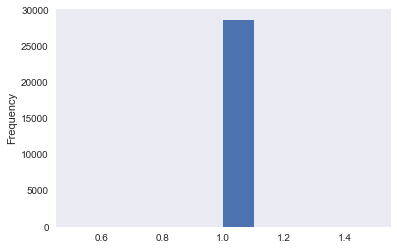

In [166]:
freq_df.plot.hist()
plt.show()

In [167]:
import pandas as pd
import numpy as np

import json

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

from datetime import datetime

matplotlib.rcParams['figure.figsize'] = (10, 10)

In [189]:
import matplotlib.patches as mpatches

def visualize_change(my_df, my_id):
    temp_df = CA_youtube_df.loc[my_id]
    
    ax = plt.subplot(111)
    ax.plot_date(temp_df['trending_date'].astype(datetime), temp_df['views'], fmt='b-')
    ax.plot_date(temp_df['trending_date'], temp_df['views'], fmt='bo')
    
    ax.plot_date(temp_df['trending_date'], temp_df['likes'], fmt='g-')
    ax.plot_date(temp_df['trending_date'], temp_df['likes'], fmt='go')
    
    ax.plot_date(temp_df['trending_date'], temp_df['dislikes'], fmt='r-')
    ax.plot_date(temp_df['trending_date'], temp_df['dislikes'], fmt='ro')
    
    ax.plot_date(temp_df['trending_date'], temp_df['comment_count'], fmt='y-')
    ax.plot_date(temp_df['trending_date'], temp_df['comment_count'], fmt='yo')
    
    patches = [
        mpatches.Patch(color='b', label='Views'),
        mpatches.Patch(color='g', label='Likes'),
        mpatches.Patch(color='r', label='Dislikes'),
        mpatches.Patch(color='y', label='Comments')
    ]
    
    plt.legend(handles=patches)
    
    #plt.title(temp_df.iloc[0]['title'])
    
    plt.show()

### Getting id of the video that trended the longest

Int64Index([20644], dtype='int64')


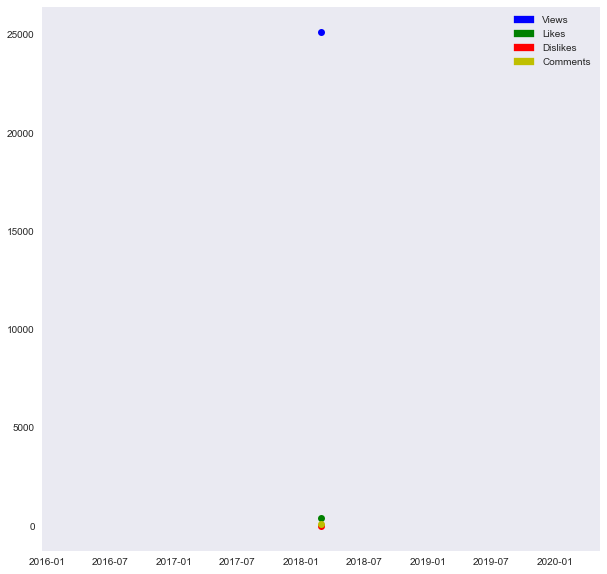

In [184]:
# getting a random video id
sample_id = freq_df.sample(n=1, random_state=4).index
print(sample_id)

visualize_change(CA_youtube_df, sample_id)

### Time series analysis

Collecting changes (increases) in viewing statistics, specifically for views, likees, comment_count, dislikes.

keep_trending is an additional column to specify whether a video will keep tredningwith the next day with the current day's increases

#### Create extra columns

In [179]:
CA_youtube_df['delta_views'] = CA_youtube_df['views']
CA_youtube_df['delta_likes'] = CA_youtube_df['likes']
CA_youtube_df['delta_dislikes'] = CA_youtube_df['dislikes']
CA_youtube_df['delta_comment_count'] = CA_youtube_df['comment_count']
CA_youtube_df['keep_trending'] = False
#First 5 rows, last 7 columns
CA_youtube_df.iloc[:5, -7:]

,description,Genre,delta_views,delta_likes,delta_dislikes,delta_comment_count,keep_trending
0,Eminem's new track Walk on Water ft. Beyoncé i...,Music,17158579,787425,43420,125882,False
1,STill got a lot of packages. Probably will las...,Comedy,1014651,127794,1688,13030,False
2,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy,3191434,146035,5339,8181,False
3,I know it's been a while since we did this sho...,Entertainment,2095828,132239,1989,17518,False
4,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,33523622,1634130,21082,85067,False


In [193]:
# has to have 2 rows or more
def get_delta_stat(video_id):
    temp_df = CA_youtube_df.loc[video_id]
    
    temp_df.iloc[0, -1] = True

    for row_id in range(1, len(temp_df)):
        temp_df.iloc[row_id, -5] = temp_df.iloc[row_id]['views'] - temp_df.iloc[row_id - 1]['views'] # delta_views
        temp_df.iloc[row_id, -4] = temp_df.iloc[row_id]['likes'] - temp_df.iloc[row_id - 1]['likes'] # delta_likes
        temp_df.iloc[row_id, -3] = temp_df.iloc[row_id]['dislikes'] - temp_df.iloc[row_id - 1]['dislikes'] # delta_dislikes
        temp_df.iloc[row_id, -2] = temp_df.iloc[row_id]['comment_count'] - temp_df.iloc[row_id - 1]['comment_count'] # delta_comment_count
        temp_df.iloc[row_id, -1] = True # keep_trending

    temp_df.iloc[len(temp_df) - 1, -1] = False
    
    return temp_df

In [194]:
CA_youtube_df.loc[sample_id]

,video_id,trending_date,title,channel_title,publish_date,id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre,delta_views,delta_likes,delta_dislikes,delta_comment_count,keep_trending
20644,5IhaFQjOqJA,2018-02-27,DC's Legends of Tomorrow 3x13 Promo No Country...,TV Promos,2018-02-27,24,02:03:02,"dc's legends of tomorrow 3x13 promo|""dc's lege...",25150,392,...,False,False,False,DC's Legends of Tomorrow 3x13 No Country for O...,Entertainment,25150,392,2,118,False


In [195]:
sample_delta_df = get_delta_stat(sample_id)
sample_delta_df[['trending_date', 'views', 'likes', 'dislikes', 'comment_count', 'delta_views', 'delta_likes', 'delta_dislikes', 'delta_comment_count', 'keep_trending']]


,trending_date,views,likes,dislikes,comment_count,delta_views,delta_likes,delta_dislikes,delta_comment_count,keep_trending
20644,2018-02-27,25150,392,2,118,25150,392,2,118,False


We see that for our sample_id video, all of our "delta" statistics are correctly updated, for example:

delta_views on the first day is the same as views
delta_views on the second day is the increase in views from the first day
keep_trending is True except for the last day
Now, we will apply the function to all the video IDs in our dataset:

In [198]:
for video_id in freq_df[freq_df > 1].index:
    print(video_id)
    CA_youtube_df.loc[video_id] = get_delta_stat(video_id)

CA_youtube_df.head()[['trending_date', 'views', 'likes', 'dislikes', 'comment_count', 'delta_views', 'delta_likes', 'delta_dislikes', 'delta_comment_count', 'keep_trending']]

,trending_date,views,likes,dislikes,comment_count,delta_views,delta_likes,delta_dislikes,delta_comment_count,keep_trending
0,2017-11-14,17158579,787425,43420,125882,17158579,787425,43420,125882,False
1,2017-11-14,1014651,127794,1688,13030,1014651,127794,1688,13030,False
2,2017-11-14,3191434,146035,5339,8181,3191434,146035,5339,8181,False
3,2017-11-14,2095828,132239,1989,17518,2095828,132239,1989,17518,False
4,2017-11-14,33523622,1634130,21082,85067,33523622,1634130,21082,85067,False


### Visualising most statistics

Here we want to look at the videos that have the most views, likes, dislikes, comments, etc. For convenience purposes, we will write a function that would take in a column name and visualize the videos that have the most counts for statistics specified by the column name.

In [201]:
def visualize_most(CA_youtube_df, column, num=10): # getting the top 10 videos by default
    sorted_df = CA_youtube_df.sort_values(column, ascending=False).iloc[:num]
    
    ax = sorted_df[column].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in sorted_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

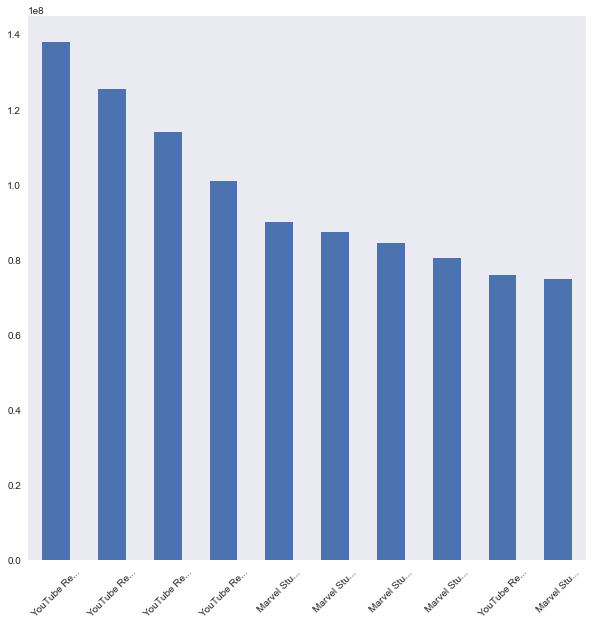

In [202]:
visualize_most(CA_youtube_df, 'views')

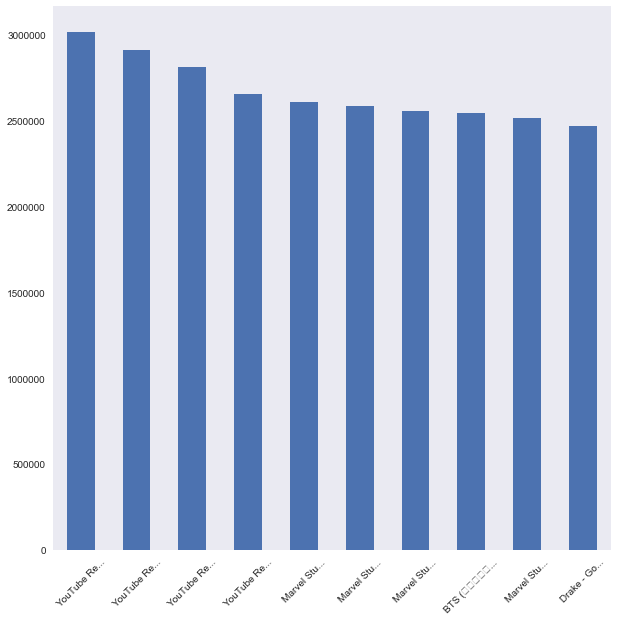

In [204]:
visualize_most(CA_youtube_df, 'likes') # only visualizes the top 5

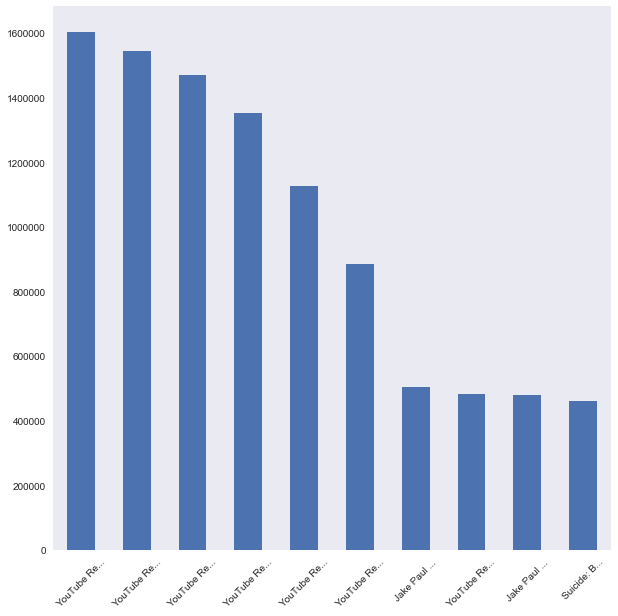

In [205]:
visualize_most(CA_youtube_df, 'dislikes')

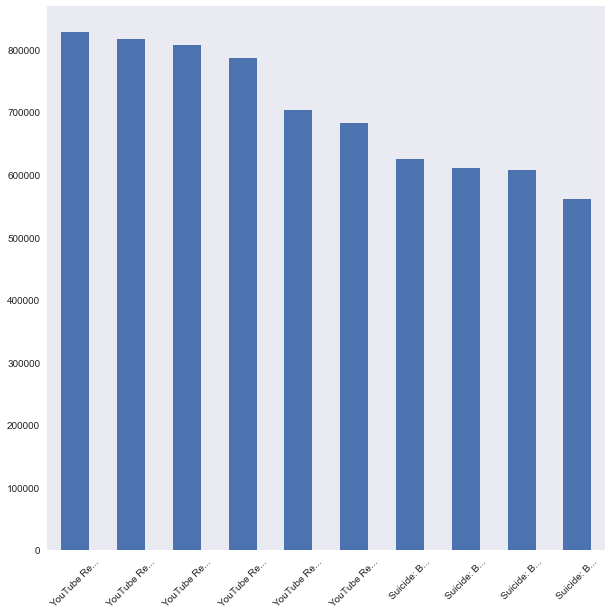

In [206]:
visualize_most(CA_youtube_df, 'comment_count')

### Video specific statistics visualisations

In [207]:
def visualize_statistics(my_df, id_list): # taking a list of video ids
    target_df = my_df.loc[id_list]
    
    ax = target_df[['views', 'likes', 'dislikes', 'comment_count']].plot.bar()
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

def visualize_like_dislike(my_df, id_list):
    target_df = my_df.loc[id_list]
    
    ax = target_df[['likes', 'dislikes']].plot.bar(stacked=True)
    
    # customizes the video titles, for asthetic purposes for the bar chart
    labels = []
    for item in target_df['title']:
        labels.append(item[:10] + '...')
    ax.set_xticklabels(labels, rotation=45, fontsize=10)
    
    plt.show()

In [208]:
sample_id_list = CA_youtube_df.sample(n=10, random_state=4).index # creates a random sample of 10 video IDs
sample_id_list

Int64Index([4261, 23480, 17285, 24037, 6079, 9258, 6715, 18193, 25763, 7592], dtype='int64')

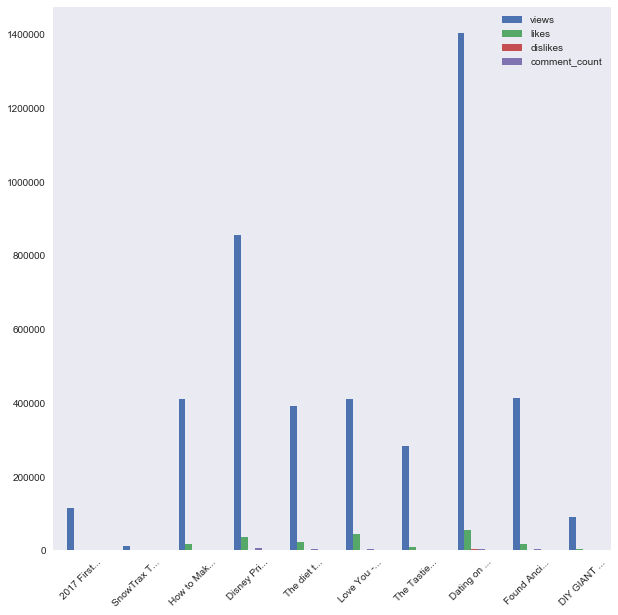

In [210]:
visualize_statistics(CA_youtube_df, sample_id_list)

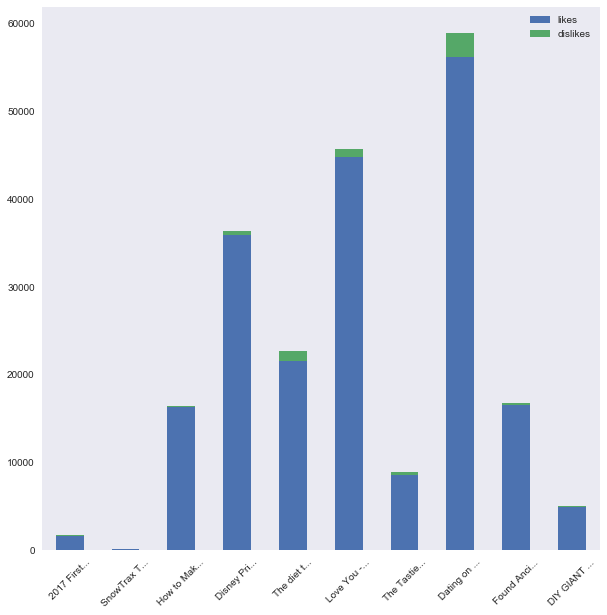

In [211]:
visualize_like_dislike(CA_youtube_df, sample_id_list)

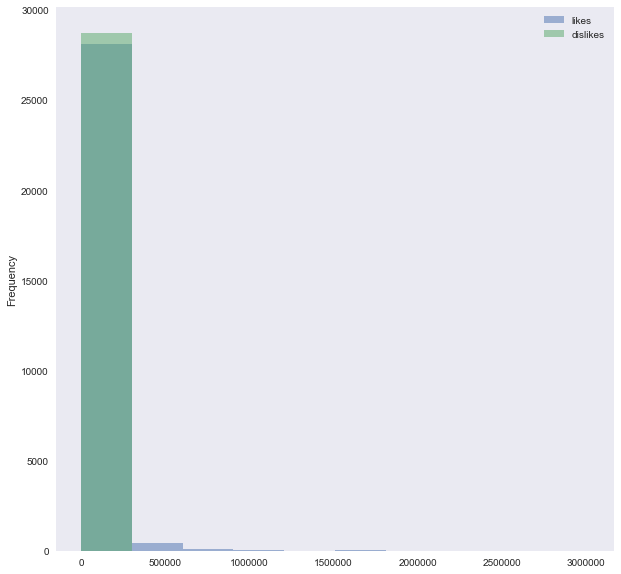

In [212]:
CA_youtube_df[['likes', 'dislikes']].plot.hist(alpha=0.5)

plt.show()

### Plot correlations between continuous features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5]), <a list of 5 Text xticklabel objects>)

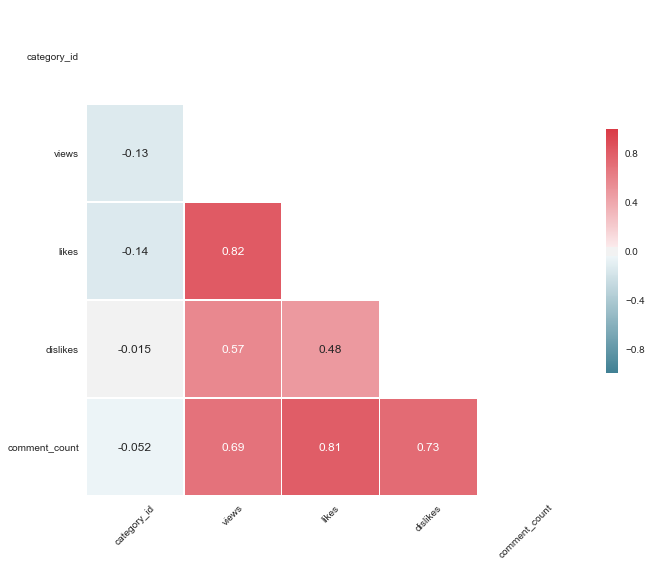

In [15]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
CA_youtube_df = pd.read_csv("CAvideos.csv")
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = CA_youtube_df[['category_id','views','likes','dislikes','comment_count']].columns

# Calculate correlation of all pairs of continuous features
corr = CA_youtube_df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

Dislkes and comment_count - strong correlation, but not as strong as with GB and US, suggesting Canadians are less likely to express negative sentiment in comments

Likes and comment_count - strong correlation. Higher than dislikes, suggesting Canadians comment more on good content.

Likes and views- strong correlation

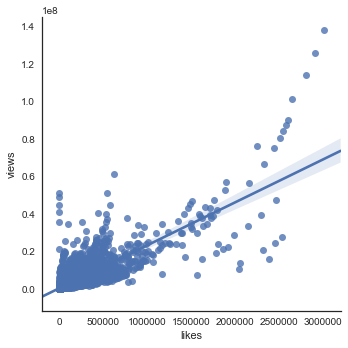

In [16]:
sns.lmplot(x='likes', y='views', data=CA_youtube_df)

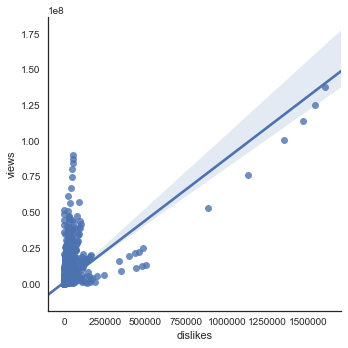

In [17]:
sns.lmplot(x='dislikes', y='views', data=CA_youtube_df)

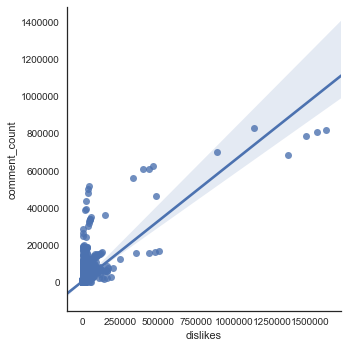

In [18]:
sns.lmplot(x='dislikes', y='comment_count', data=CA_youtube_df)

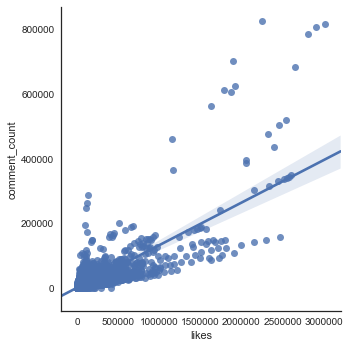

In [19]:
sns.lmplot(x='likes', y='comment_count', data=CA_youtube_df)

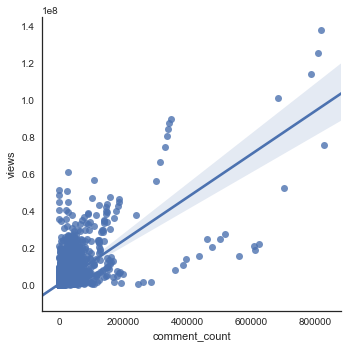

In [20]:
sns.lmplot(x='comment_count', y='views', data=CA_youtube_df)

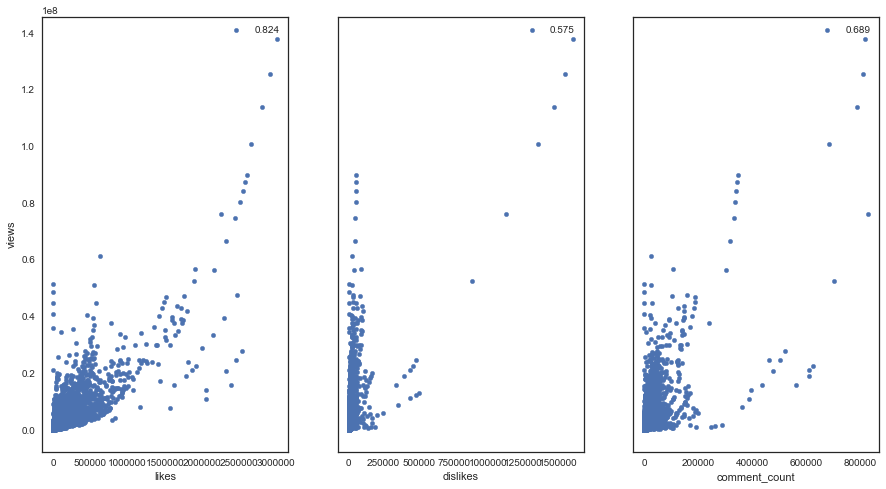

In [21]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 3, sharey=True)
CA_youtube_df.plot(kind='scatter', x='likes', y='views', label="%.3f" % CA_youtube_df[['likes', 'views']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
CA_youtube_df.plot(kind='scatter', x='dislikes', y='views', label="%.3f" % CA_youtube_df[['dislikes', 'views']].corr().as_matrix()[0,1], ax=axs[1])
CA_youtube_df.plot(kind='scatter', x='comment_count', y='views', label="%.3f" % CA_youtube_df[['comment_count', 'views']].corr().as_matrix()[0,1], ax=axs[2])

In [22]:
print("Number of rows: ", CA_youtube_df.shape[0])
counts = CA_youtube_df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

Number of rows:  28719


,category_id,views,likes,dislikes,comment_count
Count of values,28719.0,28719.0,28719.0,28719.0,28719.0


### Category analysis

In [215]:
category_count = CA_youtube_df['Genre'].value_counts() # frequency for each category
category_count

Entertainment           9210
People & Blogs          3068
News & Politics         2811
Comedy                  2721
Music                   2567
Sports                  2032
Film & Animation        1486
Howto & Style           1373
Gaming                   997
Science & Technology     766
Education                739
Travel & Events          280
Pets & Animals           265
Autos & Vehicles         264
Shows                     74
Name: Genre, dtype: int64

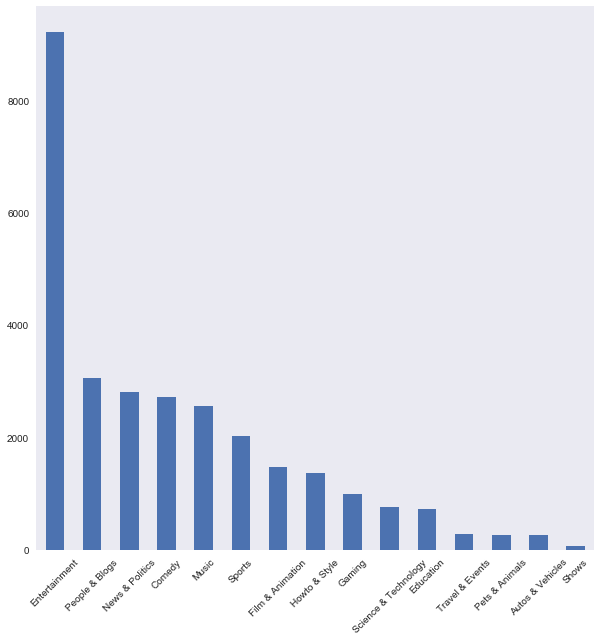

In [216]:
ax = category_count.plot.bar()
ax.set_xticklabels(labels=category_count.index, rotation=45, fontsize=10)

plt.show()

### Plot token frequency distribution: <font color = "#4DB6AC"> Description Box </font>

In [23]:
from yellowbrick.text.freqdist import FreqDistVisualizer
from sklearn.feature_extraction.text import CountVectorizer
#class yellowbrick.text.freqdist.FrequencyVisualizer(features, ax=None, n=50, orient='h', color=('purple')

In [24]:
#change text to type unicode
CA_youtube_df['description'] = CA_youtube_df['description'].astype('U')

CA_youtube_df['description']

In [26]:
description_text = CA_youtube_df['description'].str.lower()

In [27]:
#instantiate vectorizer
vectorizer = CountVectorizer()

In [28]:
vectorizer.fit(description_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
print(vectorizer.vocabulary_)

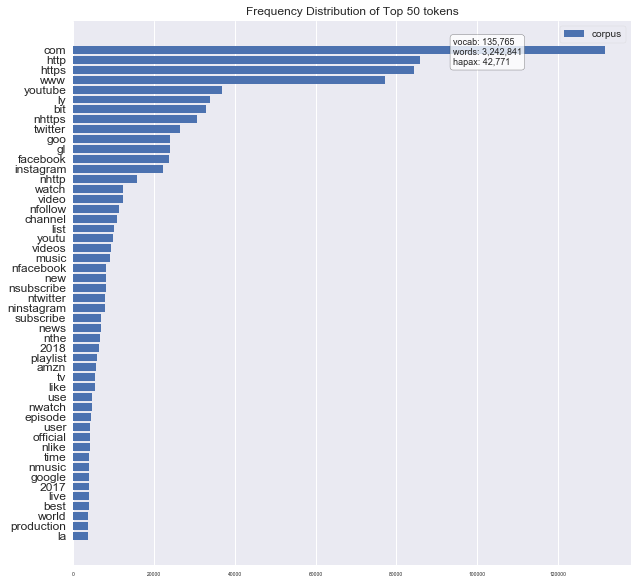

In [52]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(description_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features, color=['purple'])
visualizer.fit(docs)
visualizer.poof()

plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["xtick.labelsize"] = 5
plt.rcParams["ytick.labelsize"] = 12

Canada youtube: token frequency for description

### Plot token frequency distribution: <font color = "#8E44AD"> Title </font>

In [31]:
CA_youtube_df['title'] = CA_youtube_df['title'].astype('U')

In [ ]:
CA_youtube_df['title']

In [33]:
title_text = CA_youtube_df['title'].str.lower()

In [34]:
vectorizer.fit(title_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
print(vectorizer.vocabulary_)

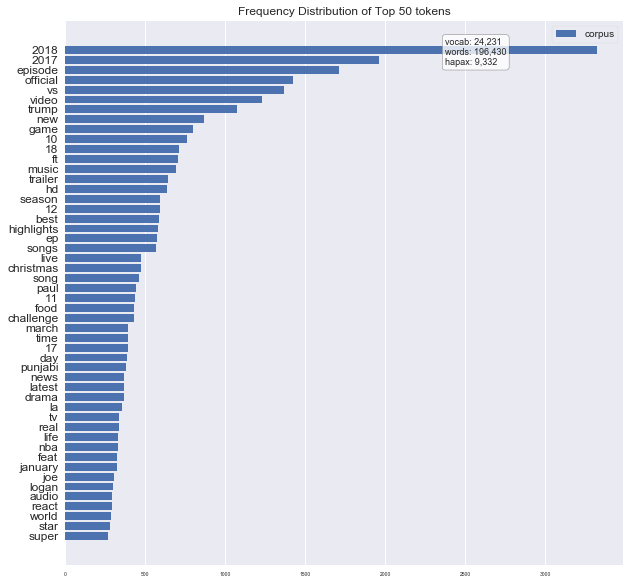

In [53]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(title_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

### Plot token frequency distribution: <font color = "#2ECC71"> Channel title </font>

In [37]:
CA_youtube_df['channel_title'] = CA_youtube_df['channel_title'].astype('U')

In [ ]:
CA_youtube_df['channel_title']

In [39]:
channel_title_text = CA_youtube_df['channel_title'].str.lower()

In [40]:
vectorizer.fit(channel_title_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
print(vectorizer.vocabulary_)

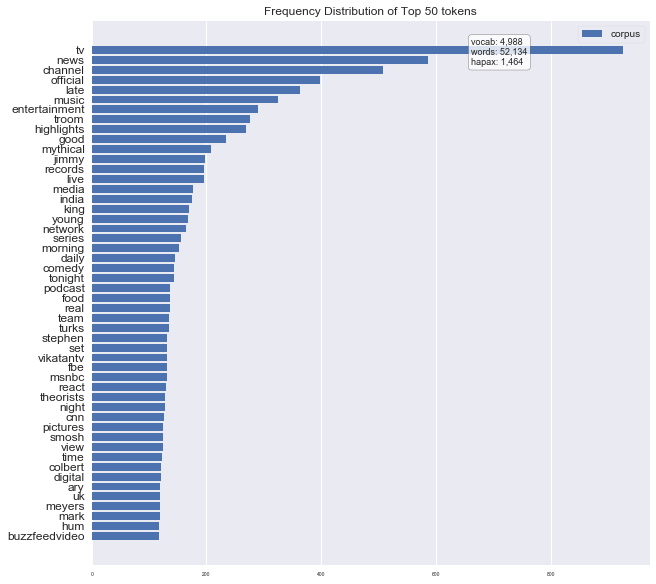

In [54]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(channel_title_text)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

### Plot token frequency distribution: <font color = "#FFC300"> Tags </font>

In [43]:
CA_youtube_df['tags'] = CA_youtube_df['tags'].astype('U')

In [ ]:
CA_youtube_df['tags']

In [45]:
canada_tags = CA_youtube_df['tags'].str.lower()

In [46]:
vectorizer.fit(canada_tags)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [ ]:
print(vectorizer.vocabulary_)

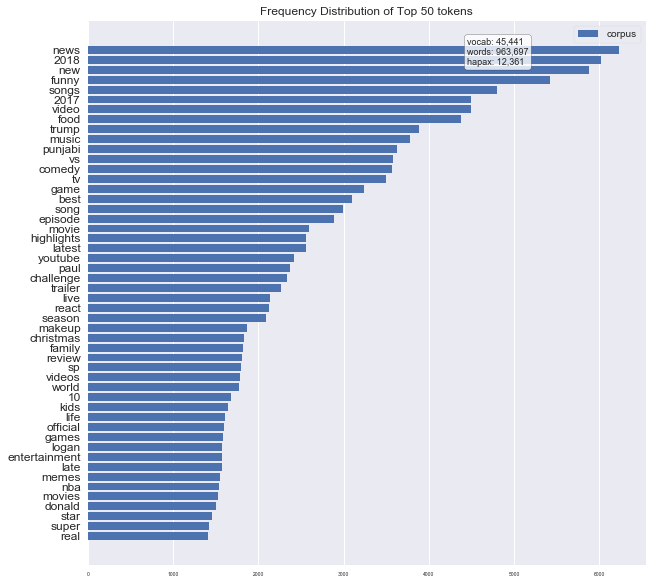

In [55]:
#stop_words = removes common conjunction words in english 
vectorizer = CountVectorizer(stop_words='english')
docs       = vectorizer.fit_transform(canada_tags)
features   = vectorizer.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.poof()

In [ ]:
vis4 = sns.boxplot(data=CA_youtube_df, x="views",y="likes")

In [56]:
import statsmodels.formula.api as sm

# The formula specifies the target feature and the descriptive features used for training the 
# linear regression model.
# We first train a simple linear regression with only one descriptive feature (Size).
# For training the model we call the method fit() on the given data stored in our df dataframe.
lm = sm.ols(formula="views ~  likes", data=CA_youtube_df).fit()

# Print the model weights/parameters
print(lm.params)

Intercept    229268.023124
likes            22.844269
dtype: float64


In [58]:
lm_df_norm = sm.ols(formula="views ~  likes + dislikes + comment_count", data=CA_youtube_df).fit()
print(lm_df_norm.params)

Intercept        291531.551649
likes                24.394478
dislikes             54.095574
comment_count       -47.974969
dtype: float64


In [59]:
print(lm_df_norm.summary())

                            OLS Regression Results                            
Dep. Variable:                  views   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                 2.667e+04
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:38:20   Log-Likelihood:            -4.5298e+05
No. Observations:               28719   AIC:                         9.060e+05
Df Residuals:                   28715   BIC:                         9.060e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.915e+05   1.06e+04     27.402